# MINI-PROJECT MDI220 : the Three Mile island accident

## Rémi JAYLET 
### 30/10/2020

## Import

In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon
from scipy.stats import gamma
from scipy.special import factorial

## Exerice 1

##### Question 1

In [9]:
# csv file name
filename = "C_id_35_NuclearPowerAccidents2016 (1).csv"
  
# initialize the dataframe and the cost vector 
df = pd.read_csv(filename)
cost = []

# select costs before the Three Mile Island accident
selected_date = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['Date'] = selected_date
df = df.sort_values(by = 'Date')
df = df.set_index(['Date'])
before_accident = df.loc[:'1979-03-27']
res = before_accident['Cost (millions 2013US$)'].dropna()

for row in res: 
    cost.append(row)

print('the cost vector:', '\n', 'x =',cost , '\n' ,'n =', len(cost))

the cost vector: 
 x = [0.0, 1100.0, 52.4, 4400.0, 2900.0, 1500.0, 1300.0, 8189.0, 1733.4, 89.9, 0.0, 77.0, 0.0, 0.0, 37.5, 38.0, 25.7, 800.0, 0.0, 6.1, 793.9, 1100.0, 87.7, 0.0, 1900.0, 25.7, 84.5, 16.1, 425.2, 2500.0, 541.4, 100.0, 150.0, 60.1, 100.0, 0.0, 1330.0, 1.1, 180.0, 1.2, 98.0, 788.4, 11.8, 990.0, 4.4, 11.4, 277.1, 15.0, 99.5, 511.5, 0.0, 3500.0, 1964.5, 17.1, 13.9] 
 n = 55


##### Question 2

![alt text](exo1q2.png "Title")

Thus $ ∀p ∈  [0,1],  \mu + \sqrt{{\sigma}^2}F_{(0,1)}^{-1}(p) = F_{\theta}^{-1}(p)$ 

The Q-Q plot of the data for the Gaussian model :


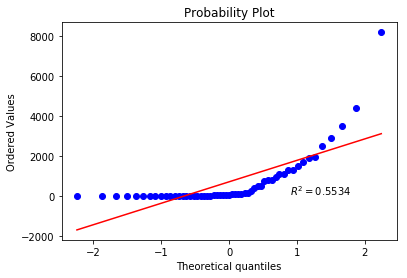

In [10]:
res = stats.probplot(cost, plot=plt, dist='norm', fit=True, rvalue=True)

print("The Q-Q plot of the data for the Gaussian model :")
plt.show()

#### Question 3

![alt text](exo1q2.png "Title")

Thus $ ∀p ∈  [0,1], \dfrac{1}{\theta }F_{1}^{-1}(p) = F_{\theta}^{-1}(p)$ 

The Q-Q plot of the data for the exponential model :


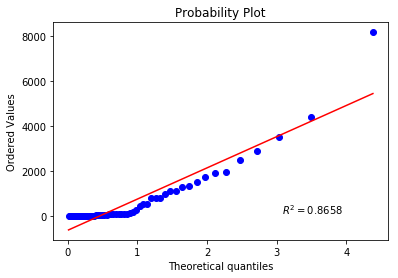

In [11]:
res = stats.probplot(cost, plot=plt, dist=stats.expon, fit=True, rvalue=True)

print("The Q-Q plot of the data for the exponential model :")
plt.show()

#### Question 4

Contrarly to the Q-Q plot for the Gaussian distribution, the points in the Q–Q plot for the exponential distribution lie approximately on the line y = x (the rvalue of the G distribution is much lower than the rvalue of the E distribution). This proves that the the values of the cost vector are similar to the exponential model of parameter 1.

## Exercice 2

#### Question 1

As the $ (X_{i}) $ are independants, the density with respect to the lebesgue measure is : 

$ p \left( x\right) =\prod ^{n}_{i=1}p \left( x_{i}\right) = \prod ^{n}_{i=1}\theta e^{-\theta x_{i}} = \theta ^{n}e^{-\theta \sum ^{n}_{i=1}x_{i}} $

The log-likelihood is thus : $ \log p(x) = n \log( \theta) -\theta \sum ^{n}_{i=1}x_{i} $ 

Hense, the estimator verifies the equation : 

$ \dfrac{\partial \log p(x)}{\partial \theta }\left( X\right) =0 \Leftrightarrow \widehat{\theta }=\dfrac{n}{\sum ^{n}_{i=1}x_{i}} $

#### Question 2

[]

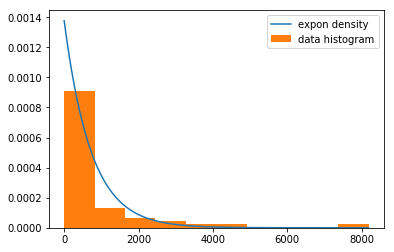

In [12]:
fig, ax = plt.subplots()

# data
sum_x = sum(cost)
max_likelyhood = len(cost)/sum_x
x = np.arange(0, max(cost))

# density:
ax.plot(x,expon.pdf(x,scale=1/max_likelyhood), label = "expon density")

#histogram:
ax.hist(cost,density = True, label = "data histogram")

ax.legend()
plt.plot()

#### Question 3

$ I\left( \theta \right) = Var_{\theta }\left( \dfrac{\log}{\partial \theta } p \left( x\right) \right) = nVar_{\theta }\left( \dfrac{\log }{\partial \theta } p_{1} \left( x\right) \right)  $ as the $ X_{i} $ are independants

$ Var_{\theta }\left( \dfrac{\log }{\partial \theta } p_{1} \left( x\right) \right) = \int _{R_{+}}\left( \dfrac{\partial \log }{\partial \theta }p_{1}\left( x\right) \right) ^{2}p_{1}\left( x\right) dx = \int ^{+\infty }_{0}\left( \dfrac{1}{\theta }-x\right) ^{2}\theta e^{-\theta x}dx = \dfrac{1}{\theta ^{2}} $ by integration by substitution

Thus, $ I\left( \theta \right) = n\dfrac{1}{\theta ^{2}} $

Therefore, $ \dfrac{g'\left( \theta \right) ^{2}}{I\left( \theta \right) }=\dfrac{1}{n\theta ^{2}} $

However, $ Var_{\theta }\left( \widehat{g}\left( X\right) \right) = \dfrac{1}{n^{2}}\sum ^{n}_{i=1}Var_{\theta }\left( X_{i}\right) $ as the $ X_{i} $ are independants

$ Var_{\theta }\left( \widehat{g}\left( X\right) \right) = \dfrac{1}{n\theta ^{2}} $ as the $ X_{i} $ follow the same law

Thus, $ Var_{\theta }\left( \widehat{g}\left( X\right) \right) = \dfrac{g'\left( \theta \right) ^{2}}{I\left( \theta \right) } $

The estimator reaches the boundary of Cramer-Rao.


However, $ b\left( \widehat{g}\left( X\right) ,g\left( \theta \right) \right) =E\left( \widehat{g}\left( X\right) \right) -\dfrac{1}{\theta } = 0 $

As the estimator is unbiased, we can conclude that he is efficient.

#### Question 4

In [13]:
g_est = sum(cost)/len(cost)

print("the value of the estimator given the observations provided is", g_est)

the value of the estimator given the observations provided is 726.3363636363638


#### Question 5

$ \forall \eta  >0, \: we \: define \: \widehat{g}_{\eta }=\eta \widehat{g} $

$ R\left( \theta ,\widehat{g}_{\eta}\right) =  E_{\theta }\left( \left( \dfrac{1}{\theta }-\widehat{g}_{\eta }\left( X\right) \right) ^{2}\right) = \dfrac{1}{\theta ^{2}}-\dfrac{2}{\theta }E(\widehat{g}_{\eta}\left(X\right)) + E({\widehat{g}_{\eta}\left(X\right)}^2) =  \dfrac{1}{\theta ^{2}}-\dfrac{2 \eta}{\theta ^{2}}+{\eta}^{2}\left( \dfrac{1}{n\theta ^{2}}-\dfrac{1}{\theta ^{2}}\right) $ as $ \widehat{g} $ is unbiased and efficent

Hence, $ \forall \theta  >0, R( \theta ,\widehat{g}_{\eta}) - R( \theta ,\widehat{g}) = \dfrac{1}{\theta ^{2}}( 1-2\eta+\eta^{2}\left( \dfrac{1-n}{n}\right) -\left( 1-2+\dfrac{1-n}{n}\right) )=  \dfrac{1}{\theta ^{2}}P(\eta) \: with \: P(\eta) = \dfrac{1-n}{n}\eta^{2}-2\eta+\dfrac{3n-1}{n}$

The zeros of P are : $ \dfrac{3n-1}{1-n} \: and \: 1 $

Thus, $ \forall \theta  >0, \forall \eta \in ]-\infty ,\dfrac{3n-1}{1-n}\left[ U\right] 1,+\infty [ , R( \theta ,\widehat{g}_{\eta}) < R( \theta ,\widehat{g}) $


According to q3, $ \widehat{g} $ is an efficient estimator. With the result of this question, we could say that the variance of $ \widehat{g}_{\eta } $ is inferior to the variance of $ \widehat{g} $ ang thus that $ \widehat{g} $ isn't MVUE. However, $ \widehat{g}_{\eta } $  isn't unbiased as $ E(\widehat{g}_{\eta })  =  \eta \widehat{g} \neq \widehat{g} $, So there is no contradiction.

#### Question 6

The median verifies the equality : $ F_{x}\left( m\right) =\dfrac{1}{2} \Leftrightarrow \left( 1-e^{-\theta m}\right) =\dfrac{1}{2} \Leftrightarrow m=\dfrac{\ln 2}{\theta } $  

Thus $ \widehat{g}_{\eta} $ is an unbiased estimator of the median cost for $ \eta = \ln 2 $ 

#### Question 7

$ \forall \theta  >0 , R( \theta ,\widehat{g}_{\eta}) - R( \theta ,\widehat{g}) = \dfrac{1}{\theta ^{2}}\left( \dfrac{3n-1}{n}-2\ln 2 +\left( \ln 2\right) ^{2}\dfrac{\left( 1-n\right) }{n}\right)  $

After studying the sign of the right member of this equality, we can conclude that : 

$ R( \theta ,\widehat{g}_{\eta}) < R( \theta ,\widehat{g}) , for \: n \leq  \left\lfloor \dfrac{3-2\ln 2-\left( \ln 2\right) ^{2}}{1-\left( \ln 2\right) ^{2}}-1\right\rfloor  = 0 $


$ R( \theta ,\widehat{g}_{\eta}) \geq  R( \theta , \widehat{g}) , for \: n \geq 0 $

## Exercice 3

#### Question 1

H0 : the expected cost of an accident is inferior to 1B dollars

H1 : the expected cost of an accident is superior to 1B dollars


As the expected value of the exponential distribution of parameter $ \theta $ is $ \dfrac{1}{\theta } $, 
$ H_{0} : \{ \theta  > 10^{-3}\} $ and $ H_{1} : \{ \theta  \leq 10^{-3}\} $

#### Question 2

$ \forall \theta ,\theta '\in \mathbb{R} _{+}, Z(x) =\dfrac{p1\left( x_{1},\ldots ,x_{n}\right) }{p0\left( x_{1}',\ldots ,x_{n}'\right) } = \left( \dfrac{\theta }{\theta'}\right) ^{n}e^{-\left( \theta -\theta' \right) n\overline{X}} $ with $ \overline{X} = \dfrac{1}{n}\sum ^{n}_{i=1}x_{i} $ 
We apply the Neyman-Pearson approach.

Firstly, we notice that the Z function strictly increases. 

$ E\left( e^{t\overline{X}}\right) =\left( E\left( e^{t\dfrac{X{1}}{n}}\right) \right) ^{n} $ as the $ X_{i} $ are independants 

However, $ E\left( e^{t\dfrac{x_{1}}{n}}\right) = \int _{R+}e^{t\dfrac{x}{n}}\theta _{0}e^{-\theta _{0}x}dx = \int _{R+}ue^{-\left( \dfrac{1-t}{\theta _{0}n}\right) u}du = \dfrac{1}{1-\dfrac{t}{\theta _{0}n}} $

thus, $ \dfrac{X_{1}}{n} - \Gamma \left( 1,n\theta _{0}\right) \: and \: \overline{X} -\Gamma \left( n,n\theta _{0}\right) $

$ \{ Z\left( X\right)  > ka\}  \: with \: P( Z\left( X\right)  > ka) =\alpha  $ implies that  $ \{ \sum ^{n}_{i=1}x_{i} > c\} \: with \: c=\dfrac{\ln \left( k\right) -n\ln \left( \dfrac{\theta }{\theta'}\right) }{\theta' -\theta } $ 

We define $ S_{n}=\sum ^{n}_{i=1}X_{i} $ and $ S_{n} -\Gamma \left( n,\theta _{0}\right) $ 


$ P( S_{n} > c) =\alpha \Leftrightarrow P( S_{n} <= c) =1-\alpha $

So, $ c=q\left( 1-\alpha \right) $

We consider the following test : $ \delta \left( x\right) =1_{s_{n} > c} $ which refers to the rejection of this test.

According to Neyman-Pearson’s approach, this test is the uniformly most powerful test at level $ \alpha $ .

#### Question 3

In [28]:
quantile = stats.gamma.ppf(0.95,55,0,1)
theta0 = 1E-3
print("S_n =", np.sum(cost))
print("c =", quantile/theta0)
p_val = 1-gamma.cdf(np.sum(cost)/55,55,0,scale=10)
print("p_value =", p_val)

S_n = 39948.5
c = 67740.08896417975
p_value = 0.013675556158064262


The test isn't rejected as  $ S_n < \theta_0*c $

#### Question 4

1231.6379811669046


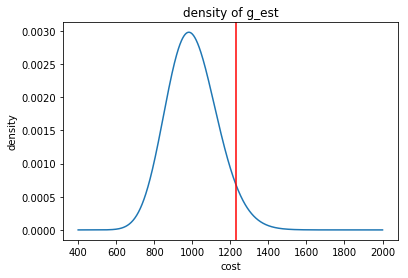

In [31]:
theta0 = 1/1000
n = 55 


# compute density of g
def density_g(X, d, n):
    density=[]
    for x in X:
        # the density is the derivate of the cumulative distribution function of g_est
        value = (d**n)*(n*x)**(n-1) * np.exp(-n*x*d) * n /factorial(n-1)
        density.append(value)
    return density

x1 = np.linspace(400,2000,1000)
plt.plot(x1,density_g(x1,theta0,n))


#compute region reject
quantile = stats.gamma.ppf(0.95,55,0,1)
region_reject=quantile/n
print(region_reject*1000)


plt.axvline(x=region_reject*1000, color = "r")
plt.title("density of g_est")
plt.xlabel("cost")
plt.ylabel("density")
plt.show()

The rejection region is : $ P( S_{n} > C) =\alpha \Leftrightarrow  P( \widehat{g}(X) < \dfrac{c}{n}) =1-\alpha $ 

We thus reject all the values after the red limit : $ \widehat{g}\left( X\right)  >1250 $

#### Question 5

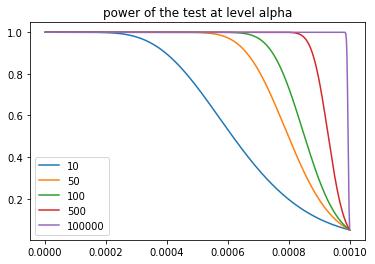

In [30]:
N = [10, 50, 100, 500, 100000]
lambda_val = np.linspace(0,0.001,1000)
lambda_val = np.delete(lambda_values,0)

def q_val(n):
    return stats.gamma.ppf(0.95,n)*1000

def power(param,n):
    return 1-stats.gamma.cdf(q_val(n),n, scale=1/param)

for n in N:
    plt.plot(lambda_val,[power(param,n) for param in lambda_val], label=n)
    plt.legend()
    
plt.title("power of the test at level alpha")
plt.show()

The greater n is, the more precise the test is.

#### Question 6

With the Central Limit Theorem, we can approximate the law of g_est(X) with the law $ Y - N\left( \dfrac{1}{\theta },\dfrac{1}{n\theta ^{2}}\right) $.

We are trying to find C such as $ P( \widehat{g}\left( x\right)  > C) =\alpha \Leftrightarrow P( \dfrac{\widehat{g}\left( x\right) -\dfrac{1}{\theta }}{\dfrac{1}{\sqrt{n}}\theta } > \dfrac{C-\dfrac{1}{\theta }}{\dfrac{1}{\sqrt{n}}\theta }) $

As this law follows anormal law of parameter 0,1. :  $ \dfrac{C-\dfrac{1}{\theta }}{\dfrac{1}{\sqrt{n}}\theta } = 1.31 $ 

And we find : 

In [17]:
print("C = ", 1.31/(np.sqrt(55)*0.001)+1000)
print("g_est = ", np.sum(cost)/55)

C =  1176.6403639653695
g_est =  726.3363636363637


We can see that that $ \widehat{g}\left( X\right)  <C $ thus we do not reject H0. We can conclude that with a risk of 0.05 the expected cost of an accident is less that one billion dollars